# Descripción del proyecto

**Se te ha ido muy bien en el curso Practicum y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.**

**Lo que tengo:**

- Registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- Archivo de volcado con todos los pedidos del período;
- Estadísticas de gastos de marketing.

**Lo que voy a investigar:**

- Cómo la gente usa el producto;
- Cuándo empiezan a comprar;
- Cuánto dinero trae cada cliente;
- Cuándo pagan.

## Paso 1. Descarga los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables. Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

Rutas de archivos:

/datasets/visits_log_us.csv. Descarga el dataset

/datasets/orders_log_us.csv. Descarga el dataset

/datasets/costs_us.csv. Descarga el dataset

## Paso 2. Haz informes y calcula métricas

### Producto:

¿Cuántas personas lo usan cada día, semana y mes?

¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

¿Cuál es la duración de cada sesión?

¿Con qué frecuencia los usuarios y las usuarias regresan?

### Ventas:

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

¿Cuántos pedidos hacen durante un período de tiempo dado?

¿Cuál es el tamaño promedio de compra?

¿Cuánto dinero traen? (LTV)

### Marketing:

¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

¿Cuán rentables eran las inversiones? (ROI)

**Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.**

## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías? Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

## Paso 1. Descarga los datos y prepáralos para el análisis

In [404]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline
from math import factorial
from scipy import stats as st
import random

In [405]:
# Carga de archivos 
try:
    visits = pd.read_csv(r"C:\Users\seba\Desktop\visits_log_us.csv",dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv(r"C:\Users\seba\Desktop\orders_log_us.csv", parse_dates=['Buy Ts'])
    costs = pd.read_csv(r"C:\Users\seba\Desktop\costs_us.csv",dtype={'source_id': 'category'}, parse_dates=['dt'])
except:
    visits = pd.read_csv("/datasets/visits_log_us.csv",dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv("/datasets/orders_log_us.csv", parse_dates=['Buy Ts'])
    costs = pd.read_csv("/datasets/costs_us.csv",dtype={'source_id': 'category'}, parse_dates=['dt'])

### Información Tabla Visits

In [406]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [407]:
visits.columns = ['device','end_date','source_id','start_date','uid']

In [408]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device      359400 non-null  category      
 1   end_date    359400 non-null  datetime64[ns]
 2   source_id   359400 non-null  int64         
 3   start_date  359400 non-null  datetime64[ns]
 4   uid         359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [409]:
visits.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [410]:
visits.duplicated().sum()

0

In [411]:
visits.device.value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

### Información Tabla orders

In [412]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [413]:
orders.columns = ['buy_date','revenue','uid']

In [414]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   buy_date  50415 non-null  datetime64[ns]
 1   revenue   50415 non-null  float64       
 2   uid       50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [415]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [416]:
orders.duplicated().sum()

0

### Información Tabla costs

In [417]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [418]:
costs.columns = ['source_id','date','costs']

In [419]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


In [420]:
costs.describe()

,costs
count,2542.000000
mean,129.477427
std,156.296628
min,0.540000
25%,21.945000
50%,77.295000
75%,170.065000
max,1788.280000


In [421]:
costs.duplicated().sum()

0

**Conclusión**

**Tras el primer análisis no se observan datos faltantes ni duplicados en niguna de las 3 bases de datos, se decide renombrar columnas para facilitar el análisis posterior. Se cambian los formatos de fechas de las 3 bases de datos.**



## Paso 2. Haz informes y calcula métricas

## Productos:

In [422]:
visits.head()

,device,end_date,source_id,start_date,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [423]:
# Crearemos columnas con los días, semanas y meses por separado para ver cuantas personas utilizan el programa 
visits['session_year']  = visits['start_date'].dt.year
visits['session_month'] = visits['start_date'].dt.month
visits['session_week']  = visits['start_date'].dt.week
visits['session_date'] = visits['start_date'].dt.date
visits.head()

/tmp/ipykernel_28/950189969.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['start_date'].dt.week


,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


### ¿Cuántas personas lo usan cada día, semana y mes?

In [424]:
#Ahora vamos a calcular las métricas. Agruparemos los datos por fecha/semana de la sesión y buscaremos las medias
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('Personas que usan el producto diariamente:',(int(dau_total)))
print('Personas que usan el producto semanalmente:',(int(wau_total)))
print('Personas que usan el producto mensualmente:',(int(mau_total)))

Personas que usan el producto diariamente: 907
Personas que usan el producto semanalmente: 5716
Personas que usan el producto mensualmente: 23228


In [425]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
print(wau.head())
print(mau.head())

   session_year  session_week   uid
0          2017            22  2021
1          2017            23  4129
2          2017            24  2812
3          2017            25  2878
4          2017            26  3064
   session_year  session_month    uid
0          2017              6  13259
1          2017              7  14183
2          2017              8  11631
3          2017              9  18975
4          2017             10  29692


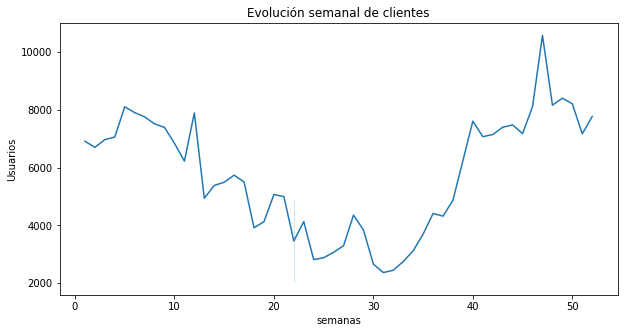

In [426]:
plt.figure(figsize=(10, 5))
plt.title('Evolución semanal de clientes')
plt.xlabel('semanas')
plt.ylabel('Usuarios')
sns.lineplot(data=wau,x='session_week',y='uid');

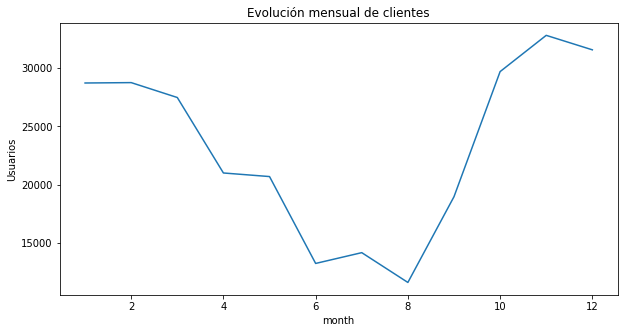

In [427]:
plt.figure(figsize=(10, 5))
plt.title('Evolución mensual de clientes')
plt.xlabel('month')
plt.ylabel('Usuarios')
sns.lineplot(data=mau,x='session_month',y='uid');

### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [428]:
visits.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [429]:
#Usuarios por dia separado por semanas
sessions_per_user = visits.groupby(['session_week', 'session_date']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
sessions_per_user

n_sessions  n_users  sessions_per_user
session_week session_date                                        
1            2018-01-01          1065      992           1.073589
             2018-01-02          1355     1265           1.071146
             2018-01-03          1317     1219           1.080394
             2018-01-04          1370     1260           1.087302
             2018-01-05          1092     1006           1.085487
...                               ...      ...                ...
52           2017-12-27          1444     1334           1.082459
             2017-12-28          1496     1377           1.086420
             2017-12-29          1315     1192           1.103188
             2017-12-30          1192     1106           1.077758
             2017-12-31           784      732           1.071038

[364 rows x 3 columns]

In [430]:
#Promedio de usuarios por día
print('Promedio de sesiones diarias de los usuarios:', sessions_per_user['sessions_per_user'].mean())

Promedio de sesiones diarias de los usuarios: 1.0821696440039719


### ¿Cuál es la duración de cada sesión?

In [431]:
#Duración promedio en segundos de cada usuario
visits['session_duration_sec'] = (visits['end_date'] - visits['start_date']).dt.seconds
print(visits['session_duration_sec'].mean()) 

643.506488592098


In [432]:
#Encontraremos los factores de adherencia de los usuarios semanal y mensualmente
sticky_wau = dau_total / wau_total * 100
print('Factor de adherencia semanal de un',sticky_wau)
sticky_mau = dau_total / mau_total * 100
print('Factor de adherencia mensual de un',sticky_mau)

Factor de adherencia semanal de un uid    15.884409
dtype: float64
Factor de adherencia mensual de un uid    3.90897
dtype: float64


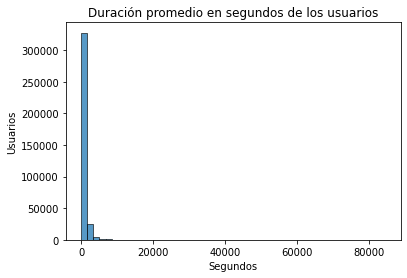

In [433]:
plt.title('Duración promedio en segundos de los usuarios')
plt.xlabel('Segundos')
plt.ylabel('Usuarios')
sns.histplot(visits['session_duration_sec'], bins= 50);


In [434]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [435]:
print(visits['session_duration_sec'].mode())
print(visits['session_duration_sec'].mean())
print(visits['session_duration_sec'].median())

0    60
dtype: int64
643.506488592098
300.0


**Conclusión**

**Tras analizar la información correspondiente al producto. Evidenciamos los usuarios activos por día(907), semana(5716) y mes(23228). También descubrimos que existe un promedio de sesión por usuario de 1.08 y que la duración promedio de cada sesión es de 643 segundos. Finalmente la frecuencia con la cual regresan los usuarios equivale a un 15% semanal y un 3% mensual.**

**Además se descubrió que en los segundos que duran las sesiones, existen datos atípicos, por lo que el valor mas real en el que duran los usuarios serían 300 segundos.**

## Ventas:

### ¿Cuando la gente empieza a comprar?

In [436]:
orders_2 = orders.copy(deep=True)
orders_2.head()

,buy_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [437]:
orders.head()

,buy_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [438]:
print('Cantidad de usuarios que compraron', orders.uid.nunique())

Cantidad de usuarios que compraron 36523


In [439]:
first_purchase_date = orders.groupby('uid')['buy_date'].min()
first_purchase_date.name = 'first_purchase_date'
orders = orders.join(first_purchase_date, on='uid')
orders['first_purchase_month'] = orders['first_purchase_date'].astype('datetime64[M]')
orders['purchase_month'] = orders['buy_date'].astype('datetime64[M]')
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [440]:
producto = visits.merge(orders, on='uid', how='inner')
producto.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01


In [441]:
first_entry = producto.groupby('uid')['start_date'].min()
first_entry.name = 'first_entry'
producto = producto.join(first_entry, on='uid')
producto.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month,first_entry
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017-09-03 21:35:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00


In [442]:
first_buy = producto.groupby('uid')['buy_date'].min()
first_buy.name = 'first_buy'
producto = producto.join(first_buy, on='uid')
producto.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month,first_entry,first_buy
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:25:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:25:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017-09-03 21:35:00,2017-09-04 12:46:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00,2017-09-04 12:46:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00,2017-09-04 12:46:00


In [443]:
producto['days_lapsed'] = producto['first_buy'] - producto['first_entry']
producto.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month,first_entry,first_buy,days_lapsed
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:25:00,0 days 00:20:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00,2018-03-09 20:25:00,0 days 00:20:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017-09-03 21:35:00,2017-09-04 12:46:00,0 days 15:11:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00,2017-09-04 12:46:00,0 days 15:11:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00,2017-09-04 12:46:00,0 days 15:11:00


In [444]:
producto['days_lapsed'] = producto['days_lapsed'].dt.days

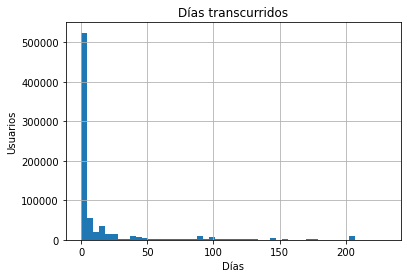

In [506]:
producto['days_lapsed'].hist(bins=50, range={0,230});
plt.title('Días transcurridos')
plt.ylabel('Usuarios')
plt.xlabel('Días');

In [446]:
#producto.iloc[0].days_lapsed/np.timedelta64(1,'D')

In [447]:
print('Promedio de días entre el primer registro y primera compra:', producto['days_lapsed'].mean())


Promedio de días entre el primer registro y primera compra: 17.291336257083486


**Conclusión**

**Inicialmente calculamos la cantidad de compradores la que asciende a 36.523 entre las fechas 2017-06-01 y 2018-06-01.Nos percatamos que los clientes tardan 17 días en promedio para efectuar una compra, esto podría indicar que el contenido de los eventos que se muestran no son sumamente llamativos o urgentes para los usuarios.**

In [448]:
ventas_source = producto.pivot_table(index='source_id',columns='purchase_month',values='revenue',aggfunc='mean',fill_value=0)
ventas_source

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
source_id,,,,,,,,,,,,,
1,5.502451,9.527559,7.161385,12.989867,8.581261,9.092026,8.827170,6.745197,6.432797,11.599352,15.834166,7.162529,0.00
2,6.725303,6.813063,5.334911,12.650045,12.944226,7.395941,21.218282,9.148580,8.683977,11.598646,10.622225,6.834659,0.00
3,4.437207,6.869988,4.647399,7.247511,6.005468,5.500729,9.489813,4.840818,6.190074,6.024283,6.189934,5.565856,0.00
4,6.002714,7.856760,6.671353,12.243548,9.024949,6.186290,8.842557,6.284756,7.772168,8.129466,8.477336,5.894003,3.42
5,5.174092,5.207625,4.991391,8.467668,7.194639,6.060473,16.592249,6.214697,6.841029,7.411243,5.754198,5.012987,0.00
7,0.000000,0.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,3.673092,4.378744,3.806566,4.556382,4.193699,3.669162,3.855890,2.377684,3.493637,2.853473,6.155130,4.854952,0.00
10,4.604406,4.390957,5.736606,3.439124,3.278795,3.032617,2.424812,2.860952,3.323906,4.187366,3.512615,4.435353,0.00


In [449]:
ventas_source.columns = [str(item)[:10] for item in ventas_source.columns]

<a id='heatmap_duplicated_2'></a>

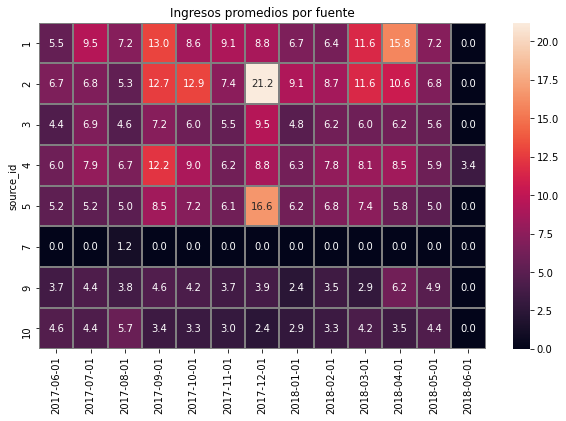

In [450]:
plt.figure(figsize=(10, 6))
plt.title('Ingresos promedios por fuente')
sns.heatmap(
    ventas_source,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

**Conclusión**

**Creamos un gráfico para identificar cuales son las fuentes que generan mas ingresos para la empresa, siendo las fuentes 1,2 y 5 las que generan mayores ingresos para la app.**

In [451]:
visits.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [452]:
first_visits = visits.groupby('uid')['start_date'].min()
first_visits.name = 'first_visits'
visits = visits.merge(first_visits, on='uid')
visits['first_visits_month'] = visits['first_visits'].astype('datetime64[M]')
visits['visits_month'] = visits['start_date'].astype('datetime64[M]')
visits.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits,first_visits_month,visits_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,2018-03-01


In [453]:
visits.pivot_table(
    index='first_visits_month',
    columns='visits_month',
    values='uid',
    aggfunc='nunique',
) 

visits_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visits_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [454]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [455]:
cohort_sizes = orders.groupby('first_purchase_month').agg({'buy_date': 'nunique','uid':'nunique'})
cohort_sizes.columns = ['pedidos_mensuales', 'cantidad_de_usuarios']
cohort_sizes

,pedidos_mensuales,cantidad_de_usuarios
first_purchase_month,,
2017-06-01,4322,2023
2017-07-01,2797,1923
2017-08-01,2133,1370
2017-09-01,3730,2581
2017-10-01,5573,4340
2017-11-01,5361,4081
2017-12-01,5483,4383
2018-01-01,4069,3373
2018-02-01,4143,3651


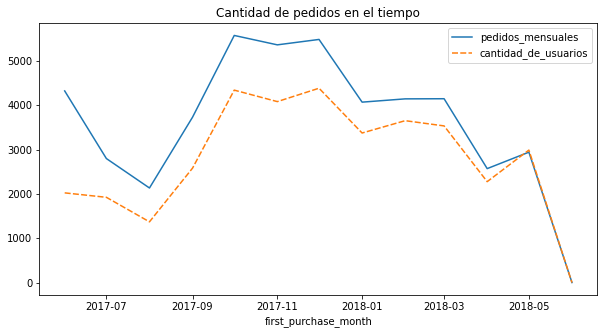

In [456]:
plt.figure(figsize=(10, 5))
plt.title('Cantidad de pedidos en el tiempo')
sns.lineplot(data=cohort_sizes);

In [457]:
print('Cantidad de pedidos promedio al mes:', cohort_sizes['pedidos_mensuales'].mean())

Cantidad de pedidos promedio al mes: 3636.076923076923


**Conclusión**

**Tras analizar los datos podemos concluir que durante el periodo examinado existe una leve regularidad de compras, sin embargo, destaca el periodo de octubre, noviembre y diciembre de 2017, por su cantidad de pedidos en la app. Podría ser lógico por las festividades que existen en esos meses.**

### ¿Cuál es el tamaño promedio de compra?

In [458]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [459]:
cohorts = orders.groupby(['first_purchase_month','purchase_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
cohorts

revenue   uid
first_purchase_month purchase_month                
2017-06-01           2017-06-01       9557.49  2023
                     2017-07-01        981.82    61
                     2017-08-01        885.34    50
                     2017-09-01       1931.30    54
                     2017-10-01       2068.58    88
...                                       ...   ...
2018-03-01           2018-05-01       1114.87    58
2018-04-01           2018-04-01      10600.69  2276
                     2018-05-01       1209.92    69
2018-05-01           2018-05-01      13925.76  2988
2018-06-01           2018-06-01          3.42     1

[79 rows x 2 columns]

In [460]:
cohorts['revenue_per_user'] = (cohorts['revenue'] / cohorts['uid'])
cohorts

revenue   uid  revenue_per_user
first_purchase_month purchase_month                                  
2017-06-01           2017-06-01       9557.49  2023          4.724414
                     2017-07-01        981.82    61         16.095410
                     2017-08-01        885.34    50         17.706800
                     2017-09-01       1931.30    54         35.764815
                     2017-10-01       2068.58    88         23.506591
...                                       ...   ...               ...
2018-03-01           2018-05-01       1114.87    58         19.221897
2018-04-01           2018-04-01      10600.69  2276          4.657597
                     2018-05-01       1209.92    69         17.535072
2018-05-01           2018-05-01      13925.76  2988          4.660562
2018-06-01           2018-06-01          3.42     1          3.420000

[79 rows x 3 columns]

In [461]:
lifetime_pivot = cohorts.pivot_table(
    index='first_purchase_month',
    columns='purchase_month',
    values='revenue_per_user',
    aggfunc='mean',
) 
lifetime_pivot

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [462]:
cohorts['revenue_per_user'].describe()

count     79.000000
mean      14.733568
std       16.764783
min        3.420000
25%        6.862373
50%       11.044651
75%       18.464348
max      138.669189
Name: revenue_per_user, dtype: float64

In [463]:
lifetime_pivot.columns = [str(item)[:10] for item in lifetime_pivot.columns]

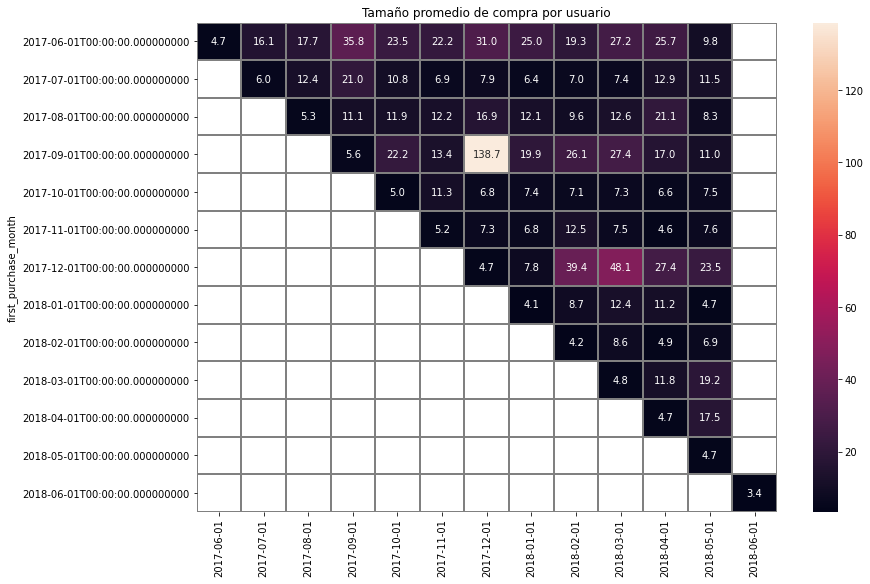

In [464]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra por usuario')
sns.heatmap(
    lifetime_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

In [465]:
print('El tamaño de compra promedio para cada persona es:', cohorts['revenue_per_user'].median())

El tamaño de compra promedio para cada persona es: 11.044651162790702


In [466]:
orders_pivot = cohorts.pivot_table(
    index='first_purchase_month',
    columns='purchase_month',
    values='uid',
    aggfunc='sum',
    fill_value=''
) 
orders_pivot

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,
2017-07-01,,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,
2017-08-01,,,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,
2017-09-01,,,,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,
2017-10-01,,,,,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,
2017-11-01,,,,,,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,
2017-12-01,,,,,,,4383.0,146.0,103.0,97.0,50.0,63.0,
2018-01-01,,,,,,,,3373.0,114.0,83.0,43.0,45.0,
2018-02-01,,,,,,,,,3651.0,118.0,58.0,39.0,


**Conclusión**

**Tras analizar el gráfico heatmap, podemos observar que todos los cohortes presentan crecimiento en ventas a contar del primer mes, el único que muestra una baja en ventas en comparación a su mes de primera compra es el cohorte de 2017-11-01 en el mes de abril. Por otra parte el cohorte de septiembre del 2019 muestra en el mes de diciembre un comportamiento atípico en comparación al general de compras.**

### ¿Cuánto dinero traen? (LTV)

In [467]:
orders_2.head()

,buy_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [468]:
orders_2['order_month'] = orders_2['buy_date'].astype('datetime64[M]')

In [469]:
first_orders = orders_2.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [470]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [471]:
orders_ = pd.merge(orders_2,first_orders, on='uid')
orders_.head() 

,buy_date,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [472]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [473]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [474]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [475]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.362207,0.242664,0.218819,0.477336,0.511265,0.367751,0.47522,0.290796,0.276607,0.302894,0.28563,0.128428
2017-07-01,3.005109,0.167605,0.311765,0.179488,0.088396,0.078024,0.060104,0.07091,0.080616,0.073573,0.077837,
2017-08-01,2.638259,0.235996,0.229241,0.195639,0.247026,0.14177,0.105332,0.202504,0.146106,0.093989,,
2017-09-01,2.822265,0.558793,0.260465,1.987896,0.200279,0.323534,0.350804,0.121575,0.092003,,,
2017-10-01,2.501866,0.267881,0.095697,0.078573,0.07578,0.060181,0.042408,0.057735,,,,
2017-11-01,2.577341,0.199617,0.099778,0.162476,0.074006,0.026939,0.057464,,,,,
2017-12-01,2.369095,0.130187,0.462548,0.532637,0.156465,0.169023,,,,,,
2018-01-01,2.067818,0.147379,0.152141,0.071389,0.031349,,,,,,,
2018-02-01,2.078494,0.139137,0.039258,0.037072,,,,,,,,


In [476]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

5.939616905585764

In [477]:
print('Promedio de dinero que trae cada usuario de la primera cohorte:', ltv_201706)

Promedio de dinero que trae cada usuario de la primera cohorte: 5.939616905585764


In [478]:
output.columns = [str(item)[:10] for item in output.columns]

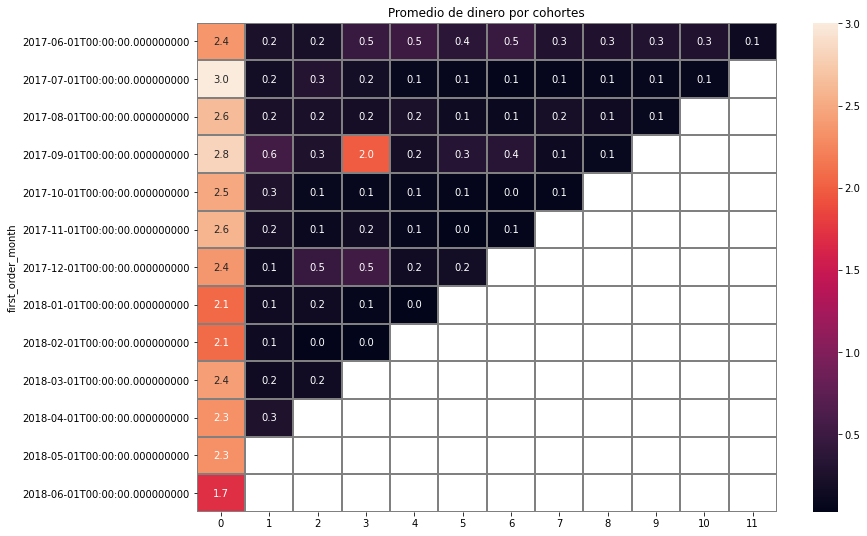

In [479]:
plt.figure(figsize=(13, 9))
plt.title('Promedio de dinero por cohortes')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

**Conclusión**

**Como muestra la tabla dinámica el primer mes de cada cohorte fue el que registro la mayor venta promedio en comparación a los meses siguientes. Se tomo como referencia la primera cohorte que corresponda al mes de Junio de 2017, arrojando un ltv de 5.93**

## Marketing:

### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [480]:
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [481]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


In [482]:
costs['source_id'].value_counts()

5     364
1     363
10    363
2     363
3     363
4     363
9     363
Name: source_id, dtype: int64

In [483]:
costs['month'] = costs['date'].astype('datetime64[M]') 

In [484]:
#Costo total por mes
monthly_costs = costs.groupby('month').sum().reset_index()
monthly_costs.head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [485]:
#Costo total por fuente en el tiempo
source_costs = costs.pivot_table(index='source_id',columns='month',values='costs',aggfunc='sum')
source_costs

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17


In [486]:
source_costs.columns = [str(item)[:10] for item in source_costs.columns]

<a id='heatmap_duplicated_1'></a>

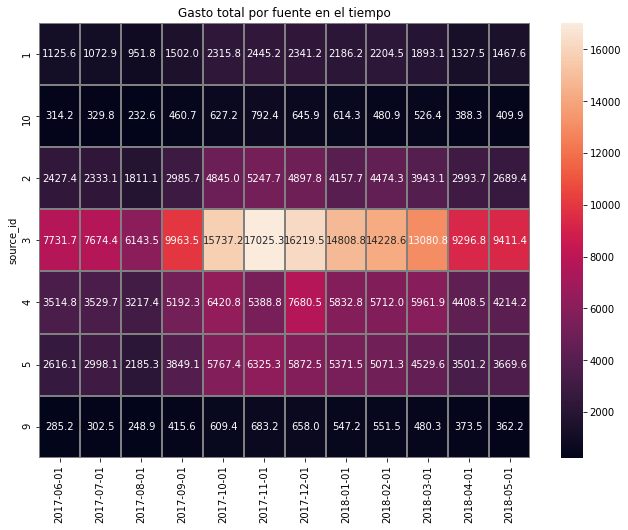

In [487]:
plt.figure(figsize=(11, 8))
plt.title('Gasto total por fuente en el tiempo')
sns.heatmap(
    source_costs,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

**Conclusión**

**La información mas importante que entrega el grafico de gasto total por fuente en el tiempo, Es que la fuente numero 3 genera un costo muy alto en comparación a las otras fuentes, será bueno seguir invirtiendo en esta fuente?, lo sabremos a continuación.**

### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [488]:
# obtener la cohorte necesaria
cohort_201706 = report[report['first_order_month'] == '2017-06-01']
# calcular los costos para el mes de la cohorte
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC:', cac_201706)
print('LTV:', ltv_201706)


CAC: 8.905091448344043
LTV: 5.939616905585764


In [489]:
report_ = pd.merge(report, costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head() 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,date,costs,month,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-01,75.20,2017-06-01,0.037173
1,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-02,62.25,2017-06-01,0.030771
2,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-03,36.53,2017-06-01,0.018057
3,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-04,55.00,2017-06-01,0.027187
4,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-05,57.08,2017-06-01,0.028216


In [490]:
cac_costs = report_.pivot_table(index='source_id',columns='month',values='cac',aggfunc='sum')
cac_costs

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,6.676876,6.137119,6.947518,5.237540,4.268664,4.194099,3.204928,3.240706,2.415207,1.607492,1.166511,0.491168
10,1.863885,1.886646,1.697591,1.606366,1.156203,1.359108,0.884134,0.910688,0.526847,0.446994,0.341169,0.137169
2,14.398695,13.345923,13.219343,10.411058,8.930876,9.001166,6.704723,6.163267,4.902043,3.348265,2.630668,0.900080
3,45.862481,43.899152,44.843358,34.743103,29.008737,29.202985,22.203313,21.951942,15.588672,11.107430,8.169429,3.149739
4,20.849036,20.190863,23.484380,18.105517,11.835650,9.243259,10.513990,8.646294,6.257968,5.062443,3.873893,1.410378
5,15.518260,17.150047,15.950949,13.422030,10.631152,10.849640,8.039042,7.962526,5.556078,3.846267,3.076582,1.228099
9,1.691864,1.730598,1.817007,1.449275,1.123336,1.171835,0.900726,0.811088,0.604218,0.407832,0.328199,0.121208


In [491]:
cac_costs.columns = [str(item)[:10] for item in cac_costs.columns]

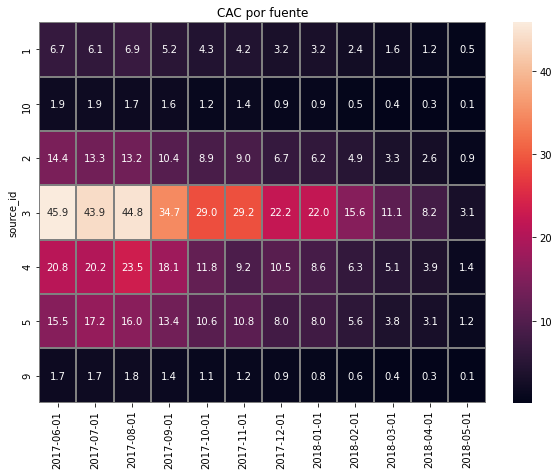

In [492]:
plt.figure(figsize=(10, 7))
plt.title('CAC por fuente')
sns.heatmap(
    cac_costs,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

**Conclusión**

**Los clientes que mas costos generaron, por lejos, son los de Fuente N°3, llegando a su pico de gastos en Noviembre de 2017.**

### ¿Cuán rentables eran las inversiones? (ROI)

In [493]:
#Calcularemos los ingresos totales

ingresos_totales = orders['revenue'].sum()
ingresos_totales

252057.19999999998

In [494]:
#Calculamos los costos totales

costos_totales = costs['costs'].sum()
costos_totales

329131.62

In [495]:
#Beneficio Bruto 

beneficio_bruto = ingresos_totales - costos_totales
beneficio_bruto

-77074.42000000001

In [496]:
#Economía Global

n_users = 36523
revenue_per_user = 6.90

var_costs = costos_totales

fixed_costs = 0

revenue = ingresos_totales
total_costs = costos_totales

print('Ingresos:', revenue)
print('Costos:', total_costs)
print('Beneficios:', revenue - total_costs)

Ingresos: 252057.19999999998
Costos: 329131.62
Beneficios: -77074.42000000001


In [497]:
#Economía Unitaria

n_users = 36523
revenue_per_user = 6.90

var_costs = pd.Series({'marketing': costos_totales, 'servers': 0})

fixed_costs = pd.Series({'salaries': 0, 'rent': 0})

revenue = n_users * revenue_per_user
total_costs = var_costs.sum() + fixed_costs.sum()

one_unit_var_costs = var_costs / n_users

print('Ingresos:', revenue_per_user)
print('Costos:', one_unit_var_costs.sum() )
print('Beneficios:',revenue_per_user - one_unit_var_costs.sum())

Ingresos: 6.9
Costos: 9.011626098622786
Beneficios: -2.1116260986227857


In [498]:
#Modelo de proyección de inversión

def unit_economics(marketing):  
    n_users = marketing / one_unit_var_costs['marketing']
    revenue = revenue_per_user * n_users
    var_costs = one_unit_var_costs * n_users
    return revenue - sum(var_costs) - sum(fixed_costs)

for m in range(329131, 1500000, 100000):
    print('Beneficio/pérdida: {} con un presupuesto de {}'.format(unit_economics(m), m))

Beneficio/pérdida: -77122.77472009527 con un presupuesto de 329131
Beneficio/pérdida: -100555.01741983957 con un presupuesto de 429131
Beneficio/pérdida: -123987.26011958375 con un presupuesto de 529131
Beneficio/pérdida: -147419.502819328 con un presupuesto de 629131
Beneficio/pérdida: -170851.74551907228 con un presupuesto de 729131
Beneficio/pérdida: -194283.98821881658 con un presupuesto de 829131
Beneficio/pérdida: -217716.23091856076 con un presupuesto de 929131
Beneficio/pérdida: -241148.47361830506 con un presupuesto de 1029131
Beneficio/pérdida: -264580.71631804935 con un presupuesto de 1129131
Beneficio/pérdida: -288012.95901779353 con un presupuesto de 1229131
Beneficio/pérdida: -311445.2017175378 con un presupuesto de 1329131
Beneficio/pérdida: -334877.444417282 con un presupuesto de 1429131


**A medida que mayor es el presupuesto para marketing, mayor es la perdida de la empresa**

In [499]:
#ROI = (beneficio neto− inversiones) / inversiones
roi = (-77074 - 329132) / 329132 
print(f'El ROI actual de la inversión es {roi} ')

El ROI actual de la inversión es -1.2341735230849629 


In [500]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [501]:
ingresos_ = orders.groupby('purchase_month')['revenue'].sum()
costos_ = costs.groupby('month')['costs'].sum()

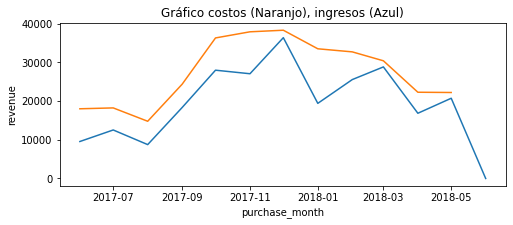

In [502]:
plt.figure(figsize=(8, 3))
plt.title('Gráfico costos (Naranjo), ingresos (Azul)')
sns.lineplot(data=ingresos_)
sns.lineplot(data=costos_);

**Conclusión**

**Calculando distintas métricas de la empresa, no nos extraña que su ROI sea negativo, ya que la empresa gasta mas de lo que recauda por ende, aparte de la inversión inicial que equivale al 100 %, tiene una deuda de 23%.**

# Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

### ¿Qué fuentes/plataformas recomendarías? Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

**Tras un largo y exhaustivo analisis, podemos concluir que la empresa tiene claramente números rojos, es decir, gasta mas de lo que recauda. Al analizar la economía de la empresa, los resultados fueron mas que desalentadores, ya que el beneficio bruto de la empresa es de -77074. Al revisar la economía unitaria para ver si existe la posibilidad de encontrar números positivos, , nos dimos cuenta que la economía unitaria cayó en la misma tendencia, ingresos de 6.90 y costos de 9.01, lo que nos da un beneficio unitario de -2.11. Creamos un modelo para proyectar alguna inversión que puede revertir la mala situación financiera de la empresa y lamentablemente a mayor inversión de marketing mas suben los costos.**

**Algo positivo que se encontró, es que visualizamos cuál era el problema de la mala gestión. El problema es que se está invirtiendo demaciado dinero en la Fuente N°3, pero al ver las ganancias, hay fuentes mucho mas rentables, como las fuentes 1, 2 y 5.**

**Creemos firmemente que si la mayor inversión fuera a las fuentes correctas, los números cambiarían, y recién podriamos estar viendo beneficios para la empresa.**

### Conclusión General

**Como Conclusión general de todo el proyecto, en la exploración inicial, realizamos cambios de datos en columnas de fecha, no encontramos datos Nulos ni duplicados.**

**Se crearon columnas de días, semanas y meses en el Dataframe visits, para poder responder cuantas personas usan la aplicación en días, semanas y meses.**

**Se respondió a la consulta de cuando las personas comienzan a comprar el producto, a lo que llegamos al resultado de 17 días entre que las personas demoran entre que entran por primera vez y compran**

**Se respondieron las preguntas de cuantos pedidos se hacen en un periodo de tiempo, concluyendo que existen 3636 pedidos promedio mensualmente**

**Después encontramos cual es el tamaño promedio de compra para cada persona, dando resultado 11,04**

**¿Cuanto dinero trae cada persona?(LTV), se analizó la primera cohorte, con fecha Junio de 2017, dando como resultado 5,939**

**Se sacó el CAC, para sacar cuánto dinero se gasta para traer a un cliente, se sacó por tipo de fuente, dando como resultado que la fuente que más gasta es la fuente N°3**

**Se sacó el ROI, analizando los ingresos y costos totales**

**Se analizaron métricas de economía global, economía unitaria y proyección de inversión, dando números negativos en cada una de estas pruebas**

**Se concluye que el presupuesto no se está invirtiendo de buena manera, ya que donde mas se invierte es en la Fuente N°3, siendo que no es de las mas rentables, como sí lo son las fuente 1, 2 y 5.**